# Graphing Notebook

In [1]:
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import pylab
%matplotlib inline
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings("ignore")
print("done")

done


In [89]:
#conda install -c conda-forge nc-time-axis

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\philipc2\Anaconda3

  added / updated specs:
    - nc-time-axis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h5b45459_0         171 KB  conda-forge
    certifi-2021.5.30          |   py37h03978a9_0         142 KB  conda-forge
    cftime-1.5.0               |   py37hebb4d16_0         150 KB  conda-forge
    conda-4.10.3               |   py37h03978a9_0         3.1 MB  conda-forge
    nc-time-axis-1.3.1         |     pyhd8ed1ab_2          14 KB  conda-forge
    openssl-1.1.1k             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following NEW p

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
# location of data
path=r"E:\datasets\GISS-E2-1-H"
file_piControl_tas =r"E:\datasets\GISS-E2-1-H\tas_Amon_GISS-E2-1-H_piControl_r1i1p1f1_gn_318001-323012.nc"
file_piControl_rlut =r"E:\datasets\GISS-E2-1-H\rlut_Amon_GISS-E2-1-H_piControl_r1i1p1f1_gn_318001-323012.nc"
file_piControl_rsut =r"E:\datasets\GISS-E2-1-H\rsut_Amon_GISS-E2-1-H_piControl_r1i1p1f1_gn_318001-323012.nc"
file_piControl_rsdt =r"E:\datasets\GISS-E2-1-H\rsdt_Amon_GISS-E2-1-H_piControl_r1i1p1f1_gn_318001-323012.nc"

ds_control=xr.open_mfdataset([file_piControl_tas,file_piControl_rlut,file_piControl_rsdt,file_piControl_rsut])
ds_control

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 612)
Coordinates:
  * time       (time) object 3180-01-16 12:00:00 ... 3230-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(612, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    rlut       (time, lat, lon) float32 dask.array<chunksize=(612, 90, 144), meta=np.ndarray>
    rsdt       (time, lat, lon) float32 dask.array<chunksize=(612, 90, 144), meta=np.ndarray>
    rsut       (time, lat, lon) float32 dask.array<chunksize=(612, 90, 144), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(612, 90, 144), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-H output prepared for CMIP6
    tracking_id:            hdl:21.14100/c7ba4e64-e16d-4f7c-a8ea-62218dc87924
    variable_id:            rlut
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

In [4]:
# load data for abrupt-4xCO2 simulations
file_abrupt_tas =r"E:\datasets\GISS-E2-1-H\tas_Amon_GISS-E2-1-H_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc"
file_abrupt_rlut =r"E:\datasets\GISS-E2-1-H\rlut_Amon_GISS-E2-1-H_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc"
file_abrupt_rsut =r"E:\datasets\GISS-E2-1-H\rsut_Amon_GISS-E2-1-H_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc"
file_abrupt_rsdt =r"E:\datasets\GISS-E2-1-H\rsdt_Amon_GISS-E2-1-H_abrupt-4xCO2_r1i1p1f1_gn_185001-200012.nc"

ds_abrupt=xr.open_mfdataset([file_abrupt_tas,file_abrupt_rlut,file_abrupt_rsdt,file_abrupt_rsut])
ds_abrupt

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 90, lon: 144, time: 1812)
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time      (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
    height    float64 ...
Dimensions without coordinates: bnds
Data variables:
    rlut      (time, lat, lon) float32 dask.array<chunksize=(1812, 90, 144), meta=np.ndarray>
    rsdt      (time, lat, lon) float32 dask.array<chunksize=(1812, 90, 144), meta=np.ndarray>
    rsut      (time, lat, lon) float32 dask.array<chunksize=(1812, 90, 144), meta=np.ndarray>
    tas       (time, lat, lon) float32 dask.array<chunksize=(1812, 90, 144), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.3.2
    ...                     ...
    table_info:             Creation Date:(21 March 2018) MD5:f76dbc1e8bf6b7e...
    title:                  GISS-E2-1-H output prepared for CMIP6
    tracking_id:            hdl:21.14100/36c464aa-d6a9-485f-a0e5-d4310a36cbf2...
    variable_id:            rlut
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

In [5]:
# compute TOA radiation = Downwelling shortwave - upwelling shortwave (reflected) - upwelling longwave
# rsdt = downwelling short

toa_abrupt =ds_abrupt.rsdt-ds_abrupt.rlut-ds_abrupt.rsut;
toa_control=ds_control.rsdt-ds_control.rlut-ds_control.rsut;
tas_abrupt =ds_abrupt.tas
tas_control =ds_control.tas

# compute global-mean, taking into account the fact that different latitudes have different areas
weights = np.cos(np.deg2rad(ds_abrupt.lat))
toa_abrupt =toa_abrupt.weighted(weights).mean(dim=('lat','lon'))
toa_control=toa_control.weighted(weights).mean(dim=('lat','lon'))

tas_abrupt =tas_abrupt.weighted(weights).mean(dim=('lat','lon'))
tas_control=tas_control.weighted(weights).mean(dim=('lat','lon'))


# resample to annual-mean
toa_abrupt=toa_abrupt.resample(time='1Y').mean(dim='time')
tas_abrupt=tas_abrupt.resample(time='1Y').mean(dim='time')

toa_control=toa_control.resample(time='1Y').mean(dim='time')
tas_control=tas_control.resample(time='1Y').mean(dim='time')

# Gregory Plot

In [45]:
# Style of Plot
plt.style.use(['science', 'scatter', 'notebook'])

# Calculate Anomlaies
tas_anomaly=tas_abrupt-tas_control.mean(dim='time')
toa_anomaly=toa_abrupt-toa_control.mean(dim='time')

# Best Fit
m, b = np.polyfit(tas_anomaly, toa_anomaly, 1)
x = np.linspace(0, 7, 100)

# Noice String
bstring = '\n'.join((r"Slope = %.4f" % m, r"Intercept = %.4f" % b))

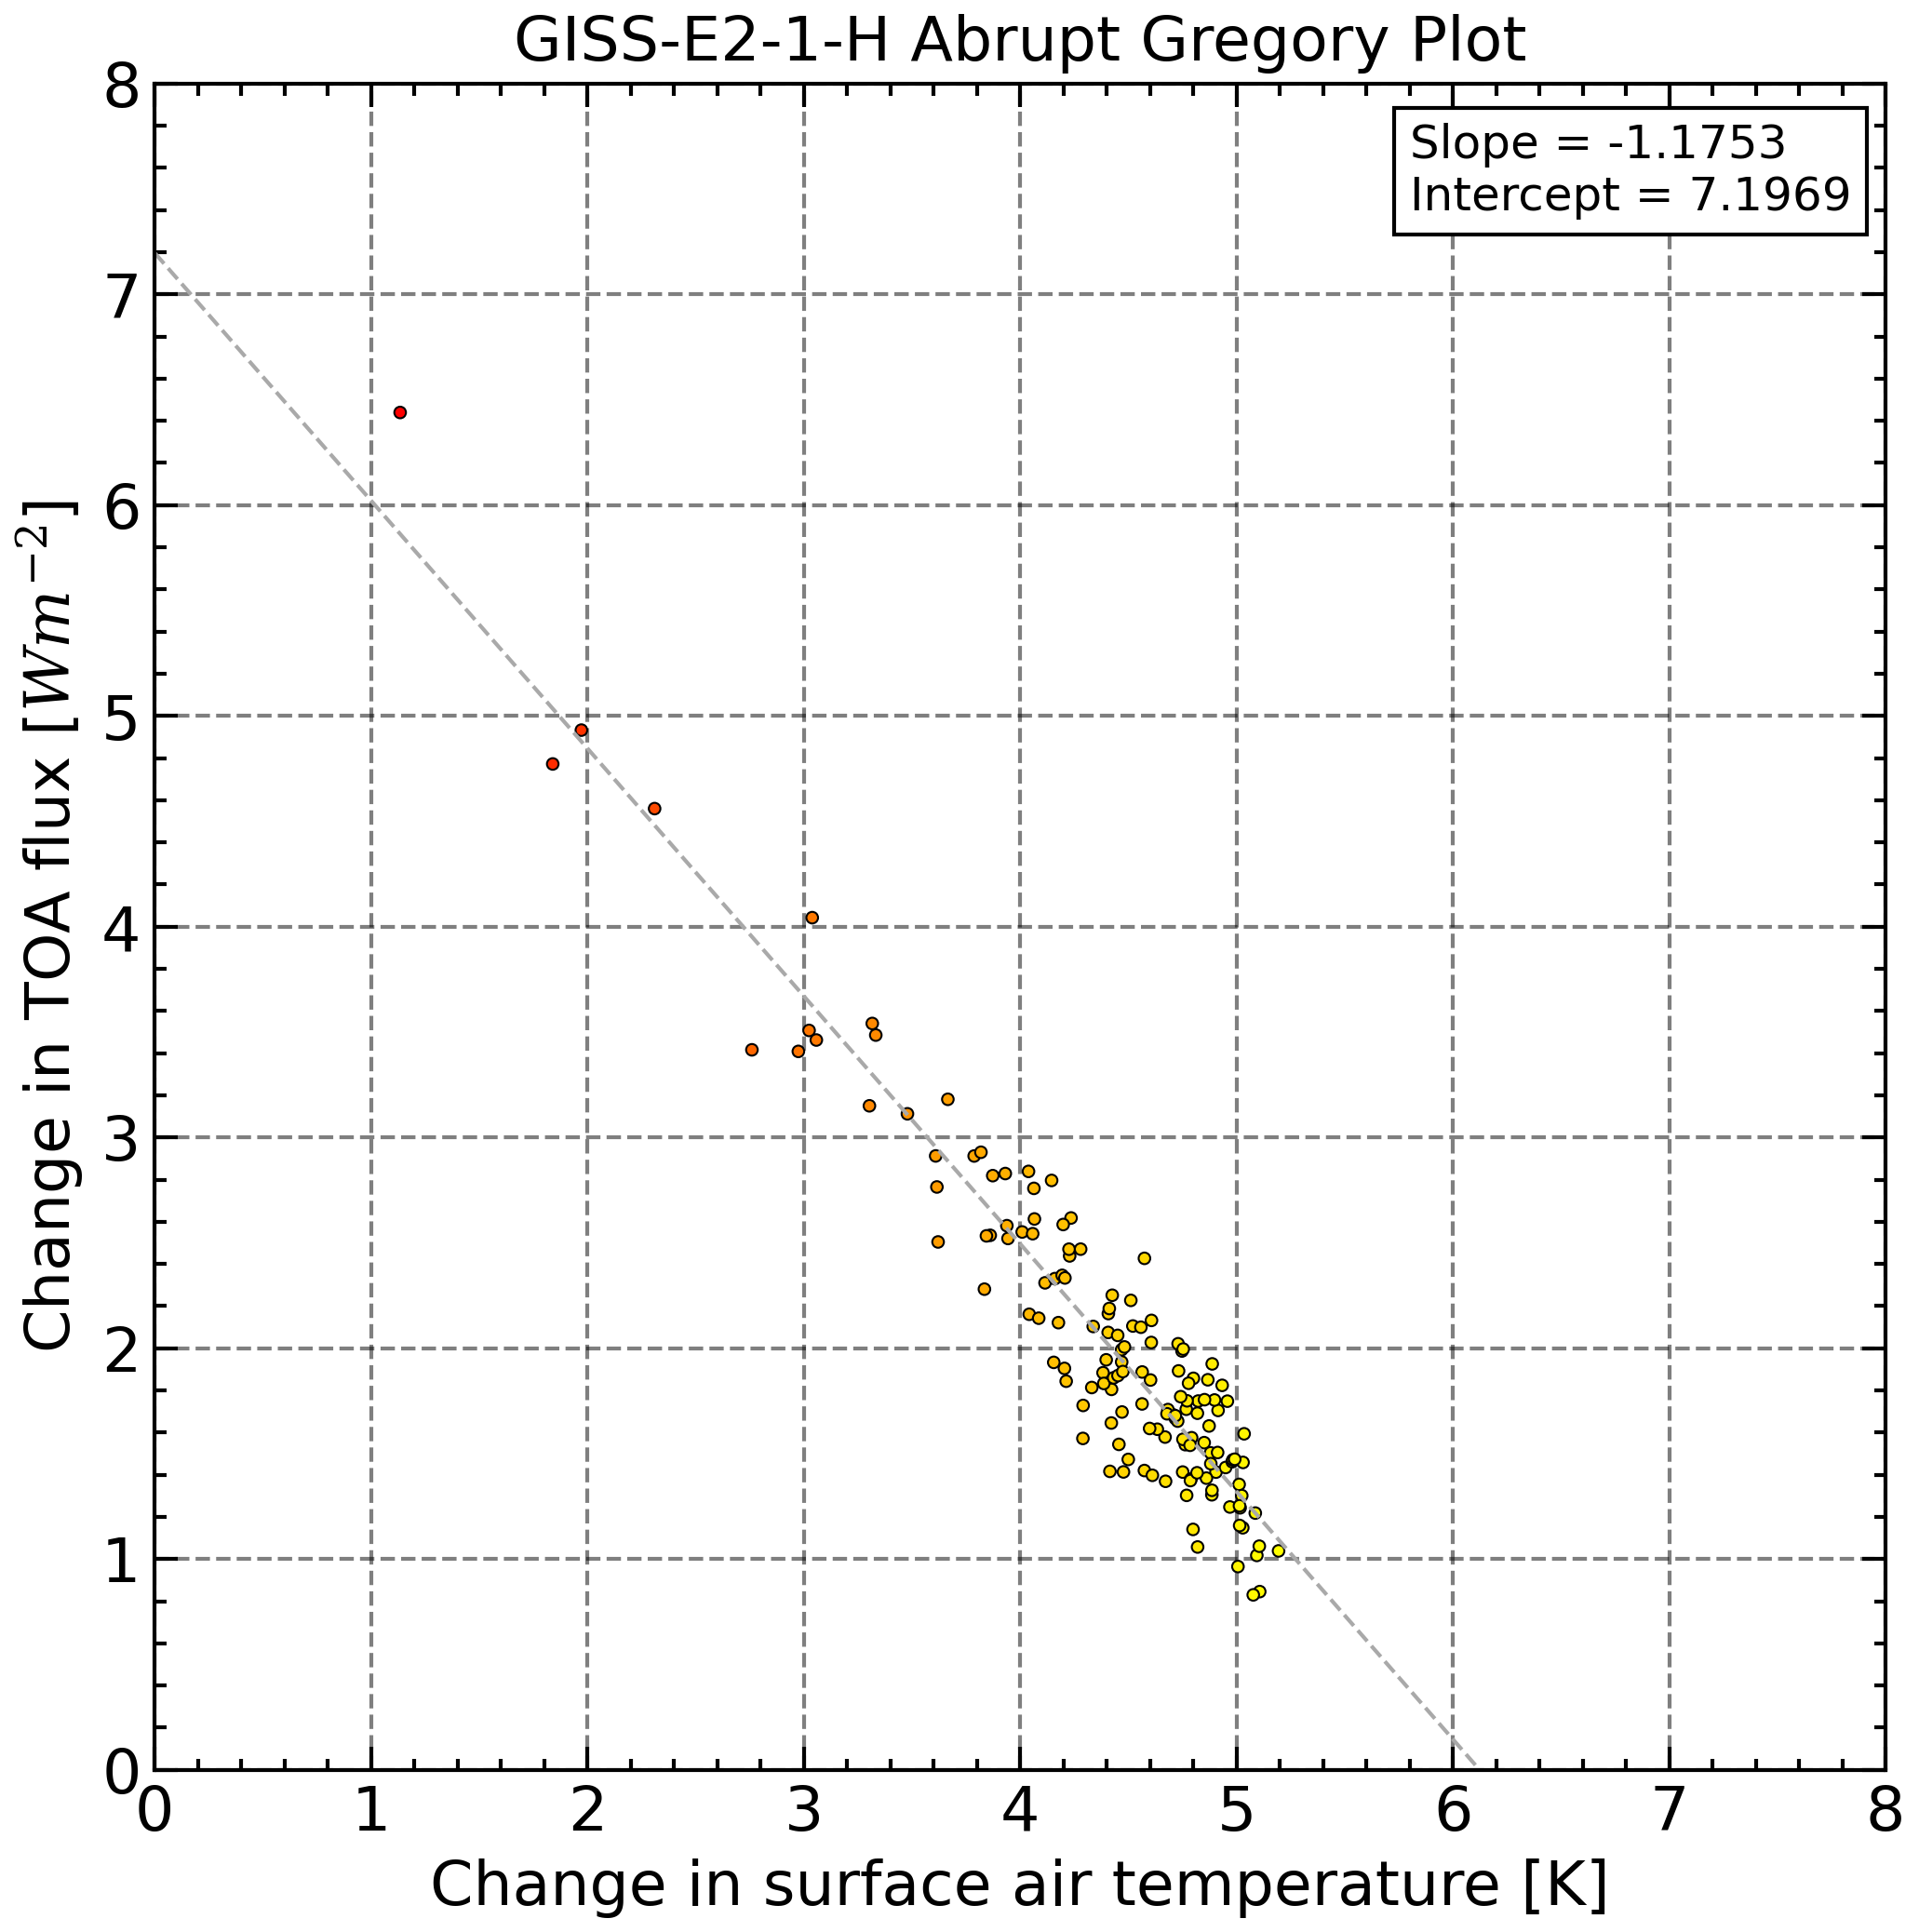

In [189]:
plt.figure(figsize=(8,8), dpi =300)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.title("GISS-E2-1-H Abrupt Gregory Plot")
plt.xlabel("Change in surface air temperature [K]")
plt.ylabel(r"Change in TOA flux [$W m^{-2}$]")
plt.text(5.8, 7.4, bstring, bbox=dict(facecolor='white', 
        edgecolor='black'), size=12)
plt.plot(x, m * x + b, '--', color = 'darkgrey', lw = 1)
plt.scatter(tas_anomaly, toa_anomaly, c=tas_anomaly, cmap='autumn', 
            lw=2, edgecolors = 'black', linewidth = 0.5)

# Other Plots

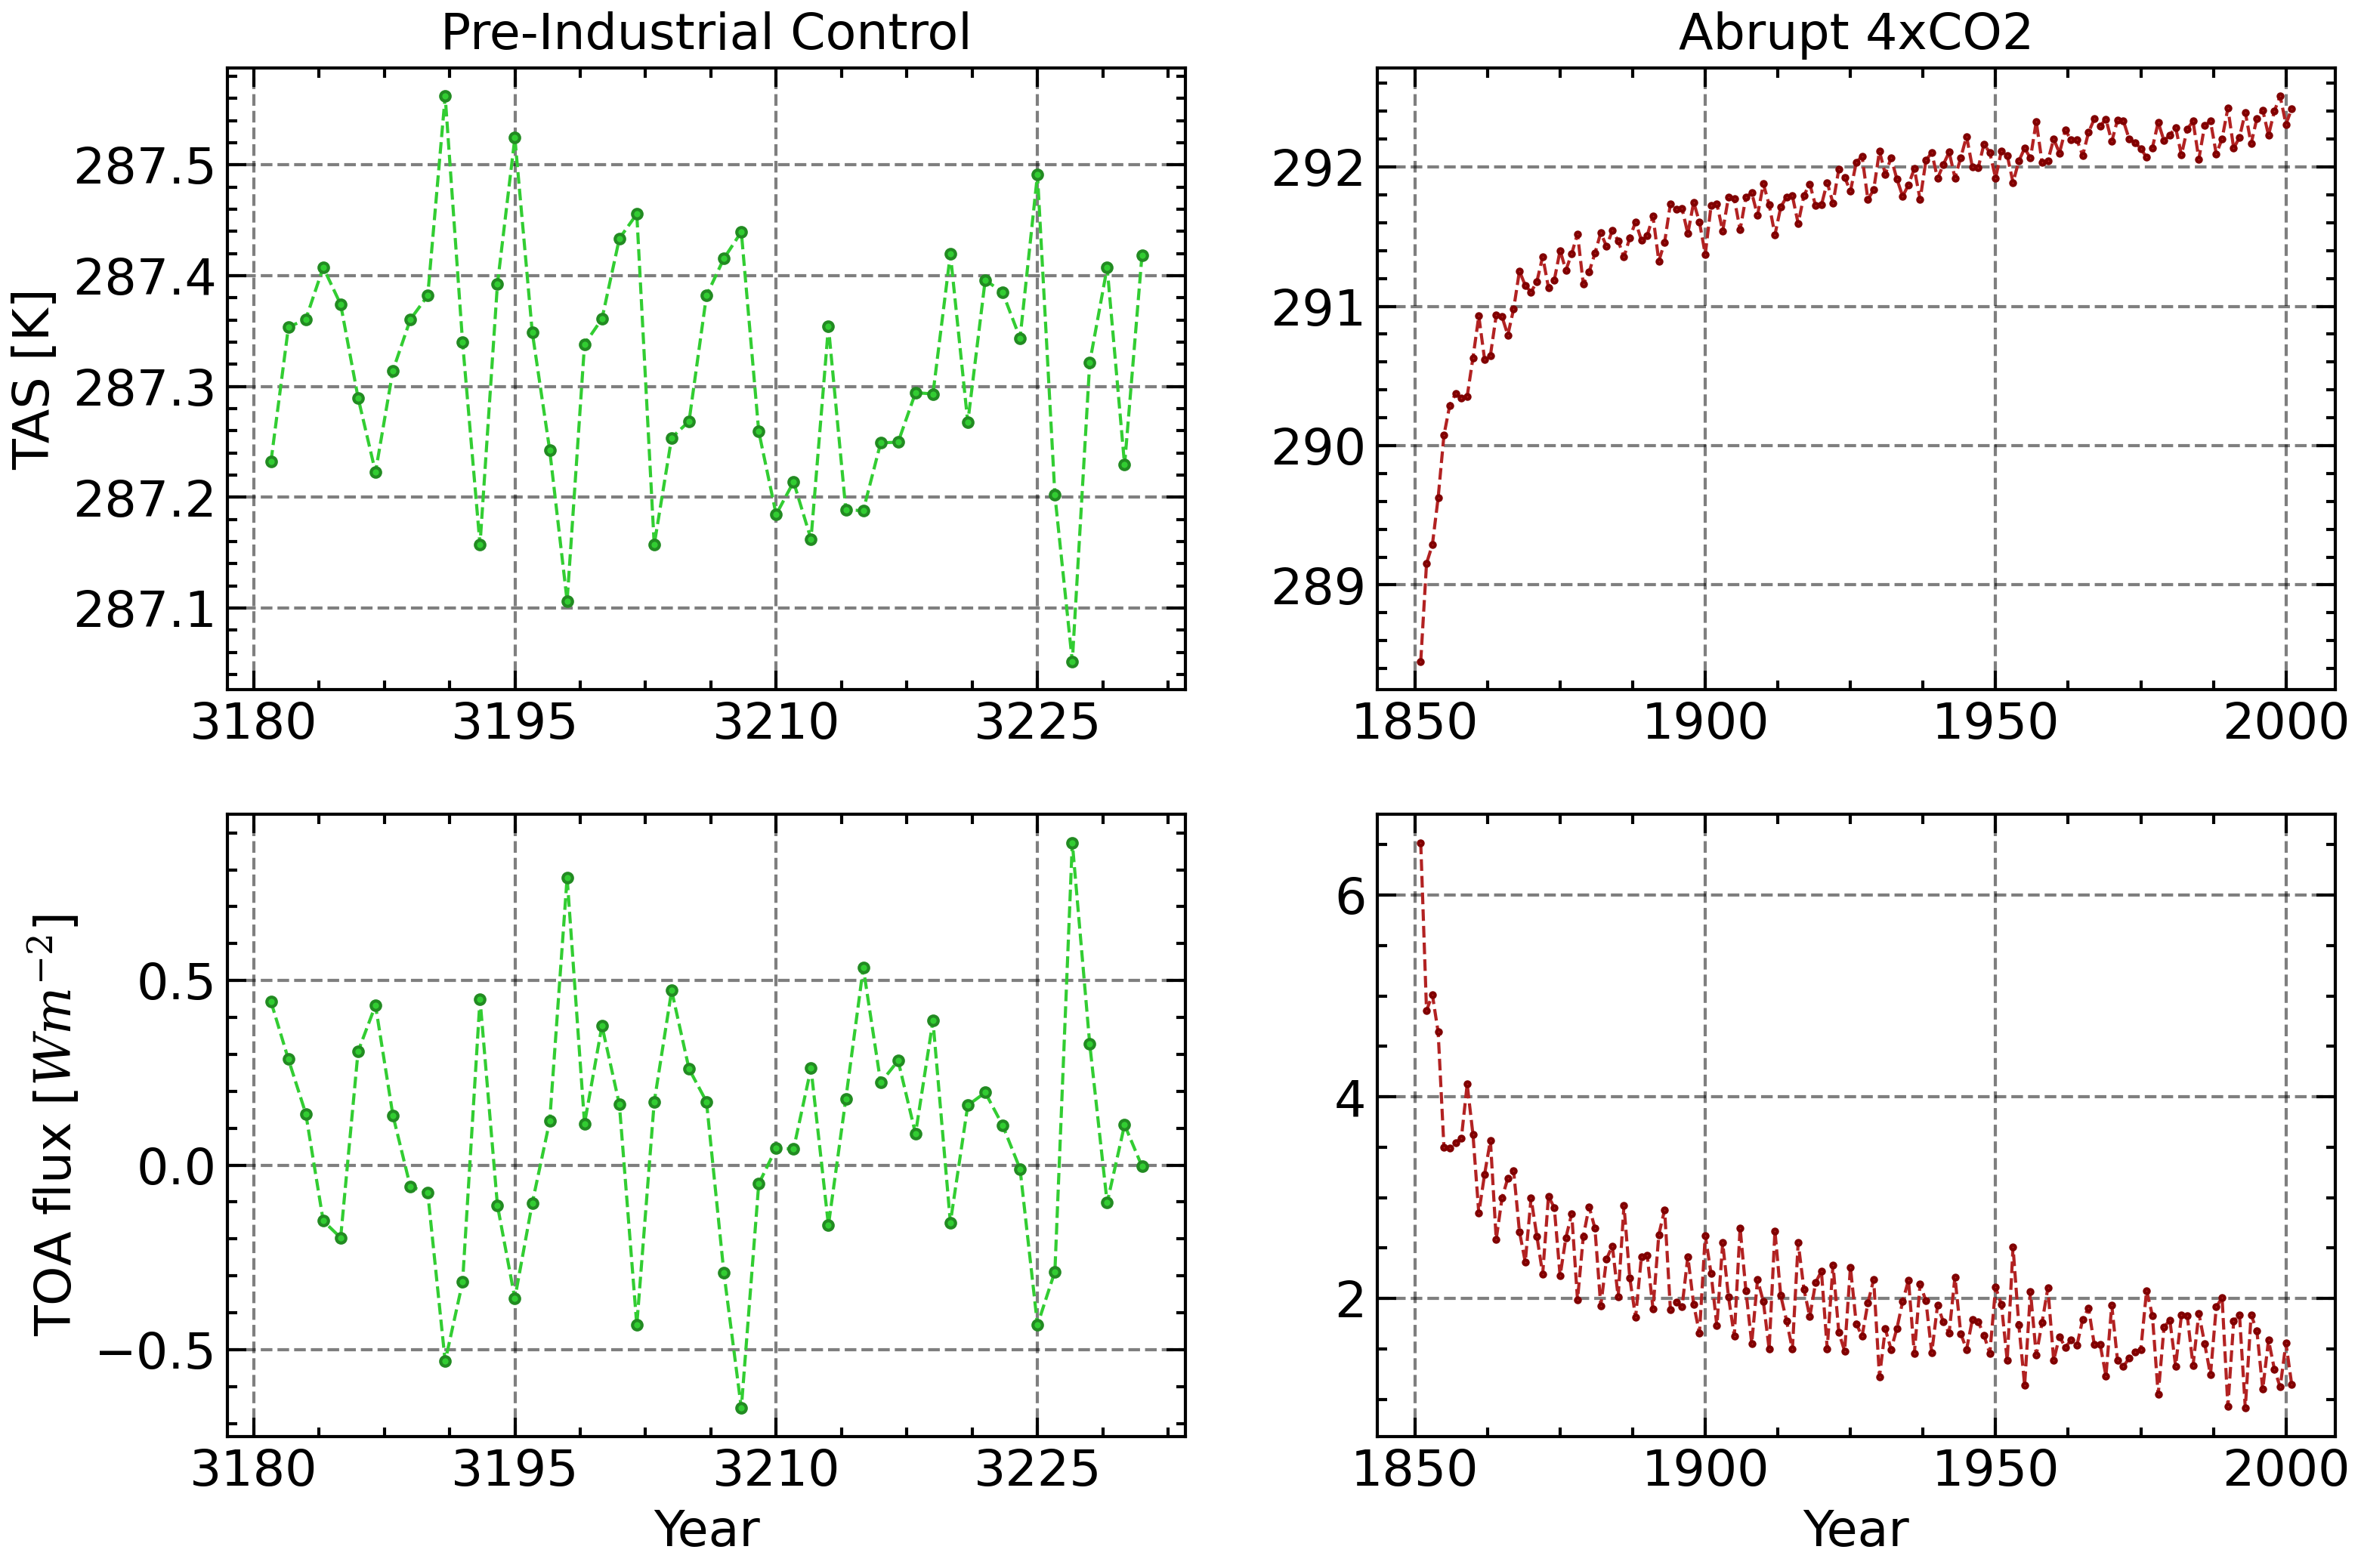

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=300)


ax = axes[0][0]
ax.set_title("Pre-Industrial Control")
ax.set_ylabel("TAS [K]")
ax.plot(tas_control.time, tas_control, 'o--', lw = 1, 
        color = 'limegreen', mec = 'forestgreen')

ax = axes[1][0]
ax.set_xlabel("Year")
ax.set_ylabel("TOA flux [$W m^{-2}$]")
ax.plot(toa_control.time, toa_control, 'o--', lw = 1, 
        color = 'limegreen', mec = 'forestgreen')

ax = axes[0][1]
ax.set_title("Abrupt 4xCO2")
ax.plot(tas_abrupt.time, tas_abrupt, 'o--', lw = 1, ms = 1.5, 
        color = 'firebrick', mec = 'maroon')

ax = axes[1][1]
ax.set_xlabel("Year")
ax.plot(toa_abrupt.time, toa_abrupt, 'o--', lw = 1, ms = 1.5, 
        color = 'firebrick', mec = 'maroon')

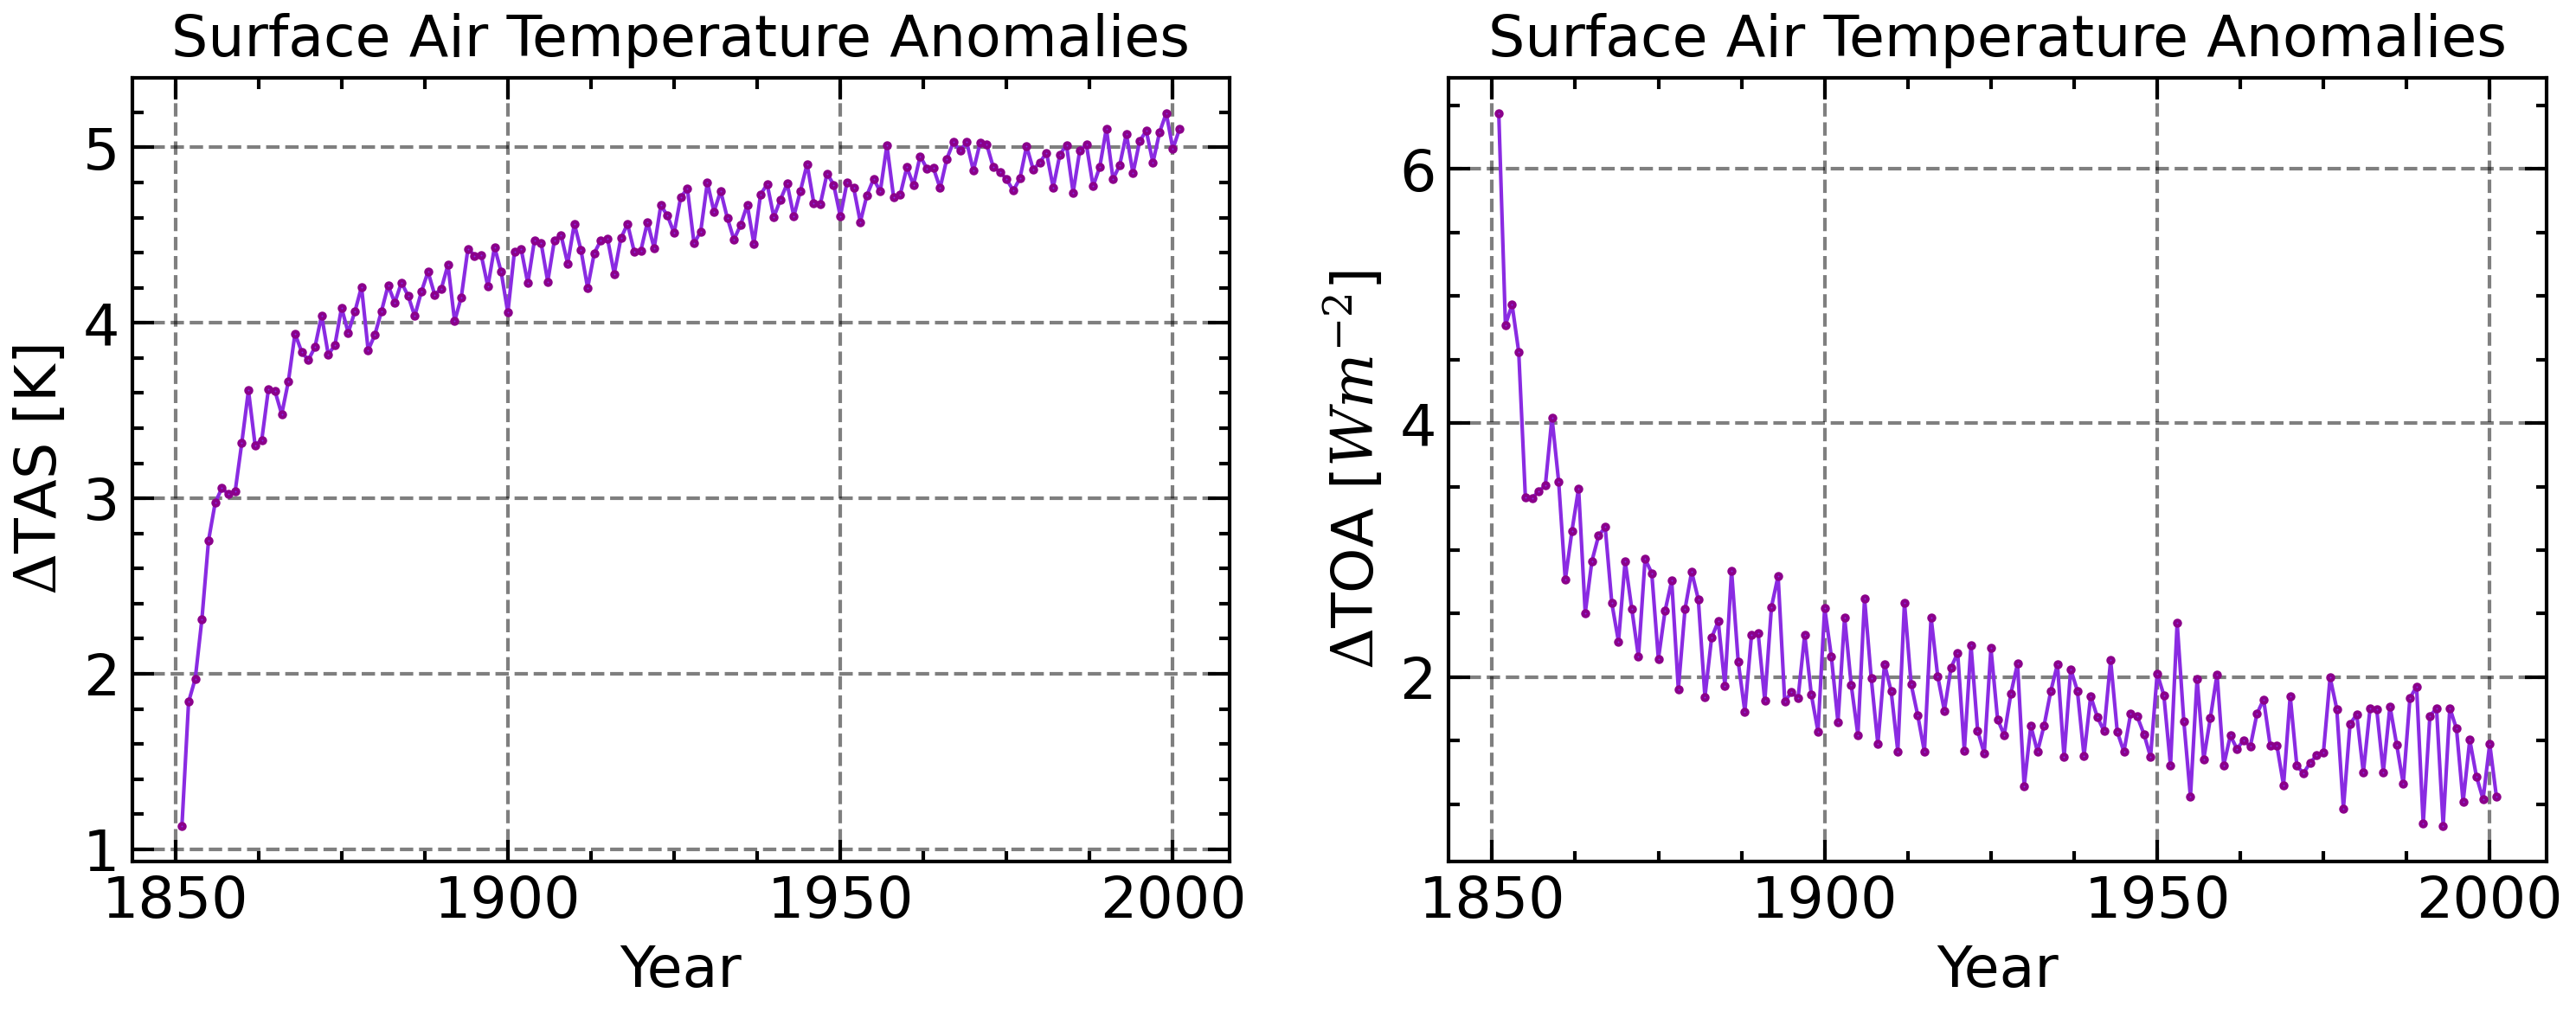

In [86]:
# Anomalies
tas_anomaly=tas_abrupt-tas_control.mean(dim='time')
toa_anomaly=toa_abrupt-toa_control.mean(dim='time')

fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

ax = axes[0]
ax.set_title("Surface Air Temperature Anomalies")
ax.set_xlabel("Year")
ax.set_ylabel("$\Delta$TAS [K]")
ax.plot(tas_anomaly.time, tas_anomaly, 'o-', lw = 1, ms = 1.5,  color = 'blueviolet', mec = 'darkmagenta')

ax = axes[1]
ax.set_title("Surface Air Temperature Anomalies")
ax.set_xlabel("Year")
ax.set_ylabel("$\Delta$TOA [$W m^{-2}$]")
ax.plot(toa_anomaly.time, toa_anomaly, 'o-', lw = 1, ms = 1.5,  color = 'blueviolet', mec = 'darkmagenta')

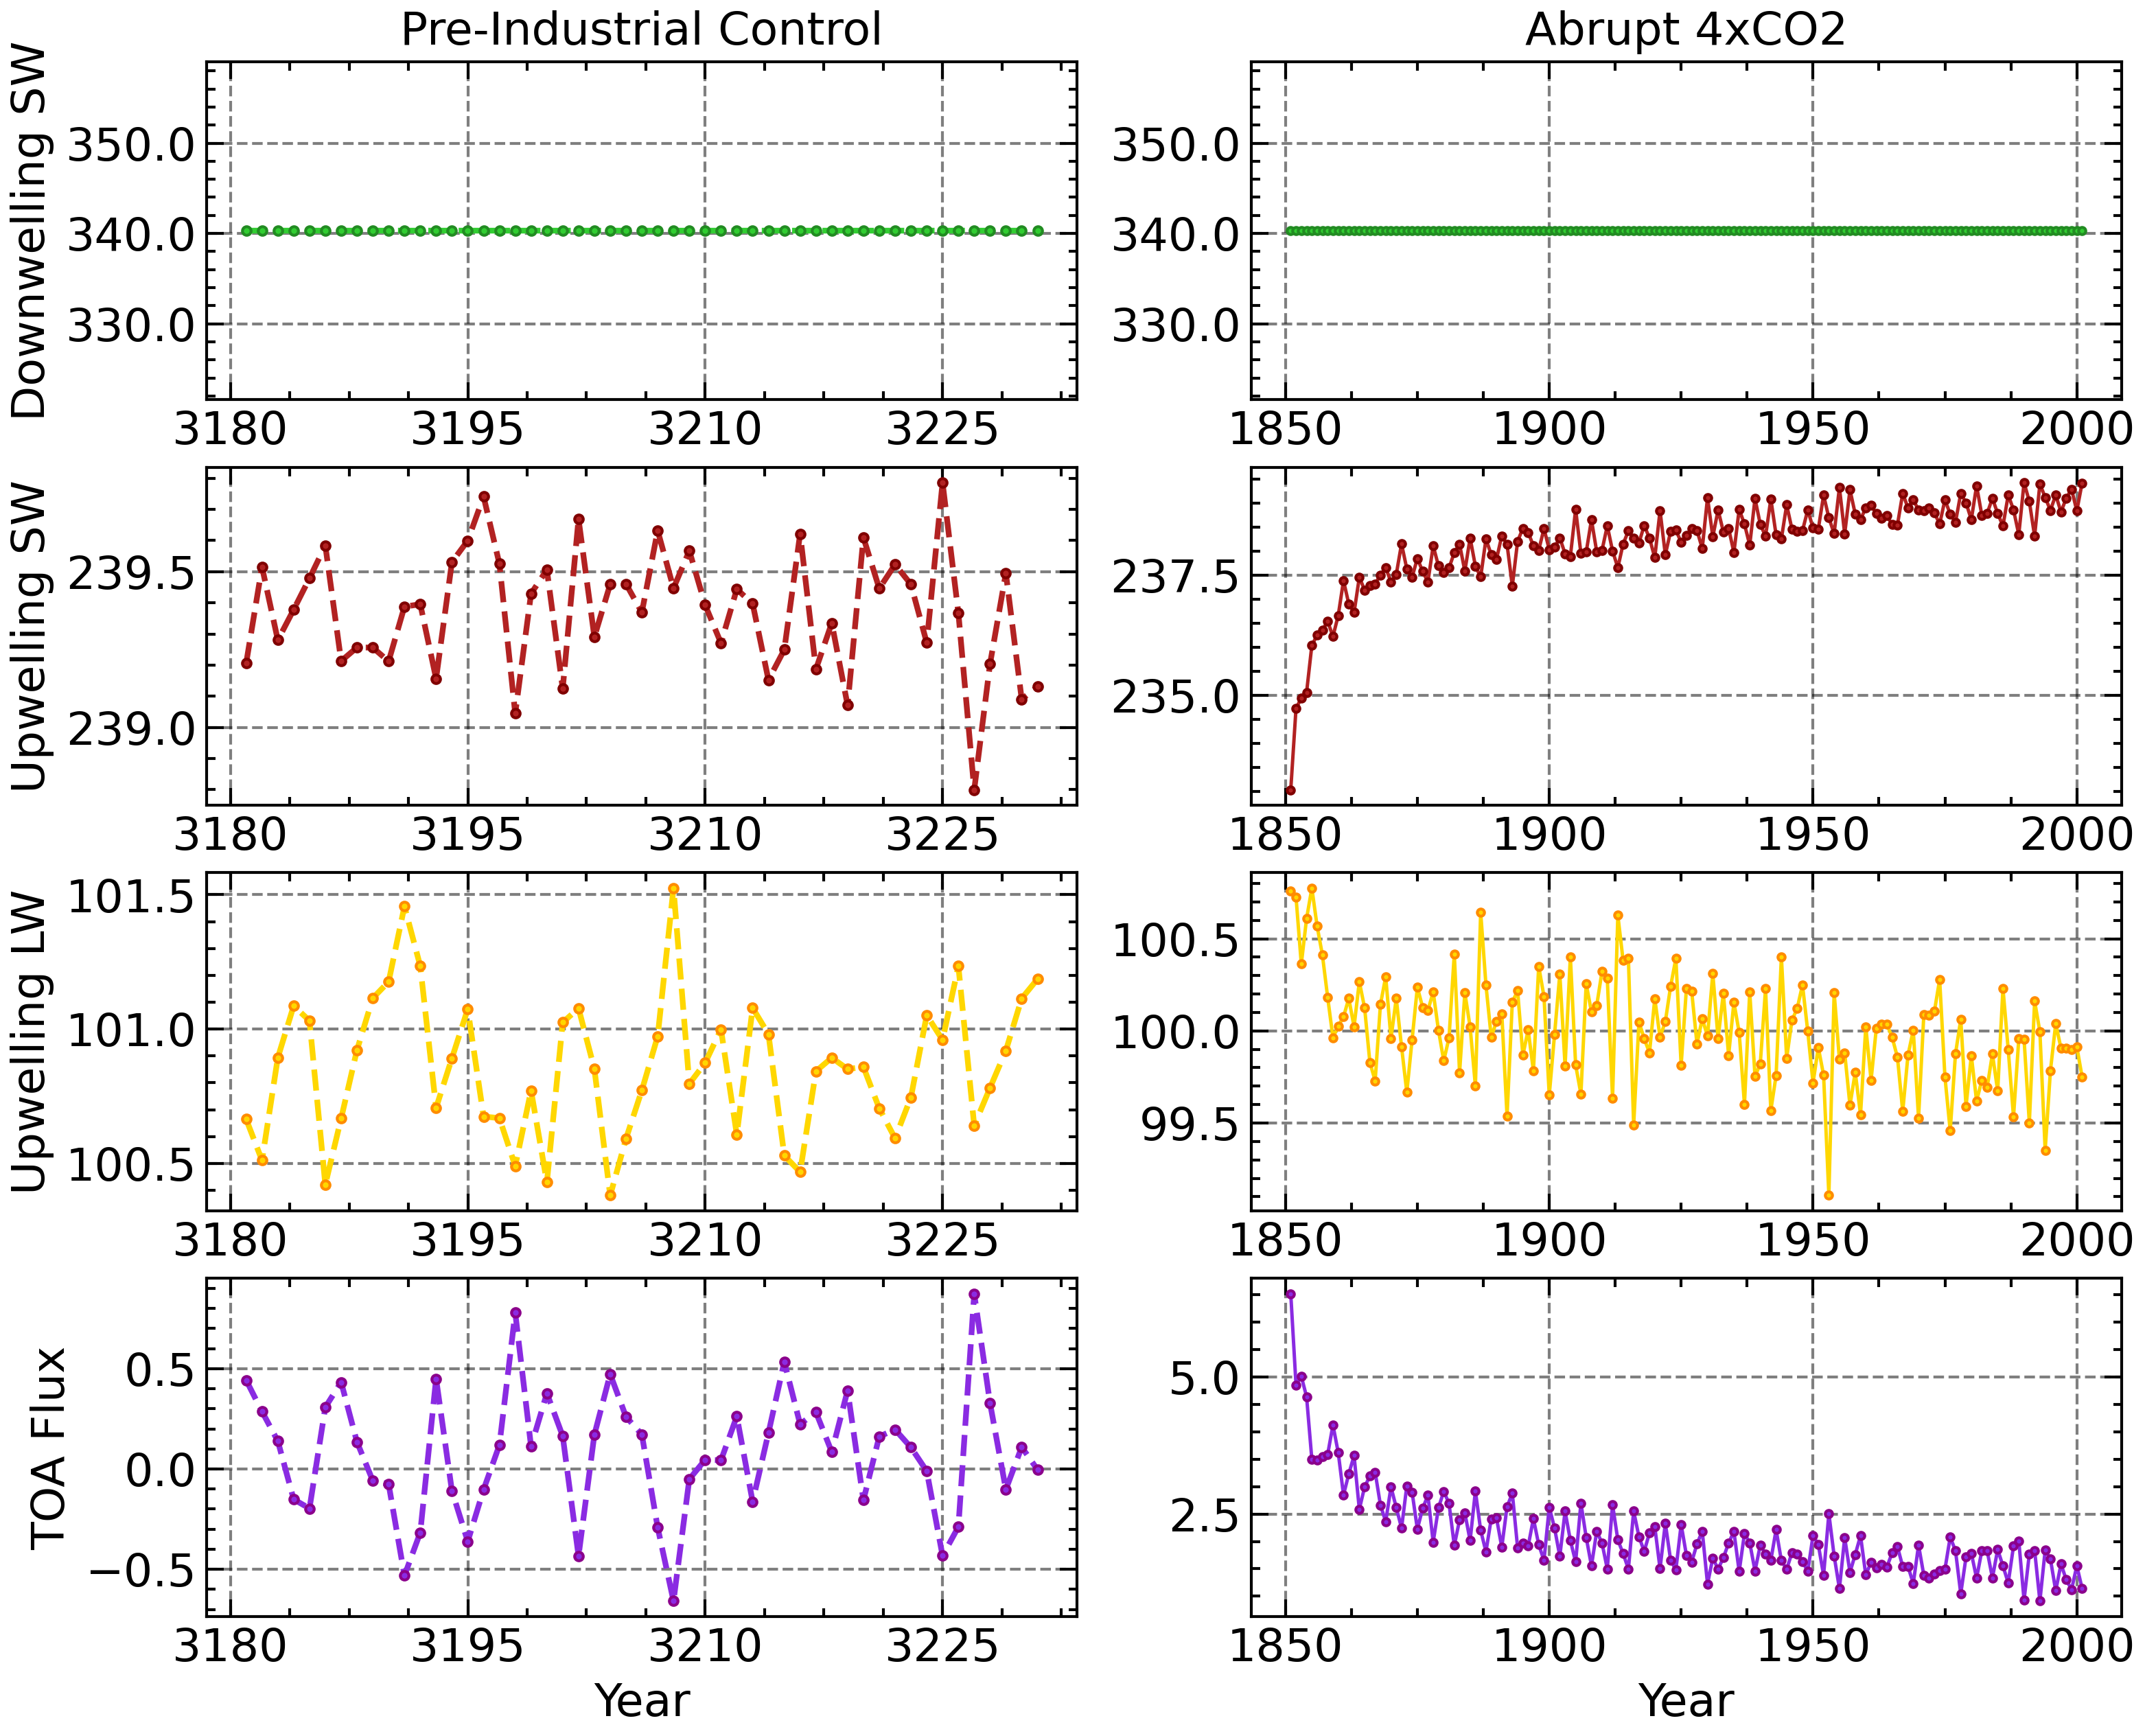

In [170]:
# Downwelling Shortwave Control
d_sw_control = ds_control.rsdt
d_sw_control = d_sw_control.weighted(weights).mean(dim=('lat','lon'))
d_sw_control = d_sw_control.resample(time='1Y').mean(dim='time')

# Upwelling Shortwave Control
u_sw_control = ds_control.rlut
u_sw_control = u_sw_control.weighted(weights).mean(dim=('lat','lon'))
u_sw_control = u_sw_control.resample(time='1Y').mean(dim='time')

# Upwelling Longwave Control
u_lw_control = ds_control.rsut
u_lw_control = u_lw_control.weighted(weights).mean(dim=('lat','lon'))
u_lw_control = u_lw_control.resample(time='1Y').mean(dim='time')

# Downwelling Shortwave Abrupt
d_sw_abrupt = ds_abrupt.rsdt
d_sw_abrupt = d_sw_abrupt.weighted(weights).mean(dim=('lat','lon'))
d_sw_abrupt = d_sw_abrupt.resample(time='1Y').mean(dim='time')

# Upwelling Shortwave Abrupt
u_sw_abrupt = ds_abrupt.rlut
u_sw_abrupt = u_sw_abrupt.weighted(weights).mean(dim=('lat','lon'))
u_sw_abrupt = u_sw_abrupt.resample(time='1Y').mean(dim='time')

# Upwelling Longwave Abrupt
u_lw_abrupt = ds_abrupt.rsut
u_lw_abrupt = u_lw_abrupt.weighted(weights).mean(dim=('lat','lon'))
u_lw_abrupt = u_lw_abrupt.resample(time='1Y').mean(dim='time')



fig, axes = plt.subplots(4, 2, figsize=(12, 10), dpi=300)

# Control Plotting
ax = axes[0][0]
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
ax.set_title("Pre-Industrial Control")
ax.set_ylabel("Downwelling SW")
ax.plot(d_sw_control.time, d_sw_control, 'o--', color = 'limegreen', mec = 'forestgreen')

ax = axes[1][0]
ax.set_ylabel("Upwelling SW")
ax.plot(u_sw_control.time, u_sw_control, 'o--', color = 'firebrick', mec = 'maroon')

ax = axes[2][0]
ax.set_ylabel("Upwelling LW")
ax.plot(u_lw_control.time, u_lw_control, 'o--', color = 'gold', mec = 'darkorange')

ax = axes[3][0]
ax.set_ylabel("TOA Flux")
ax.set_xlabel("Year")
ax.plot(toa_control.time, toa_control, 'o--', color = 'blueviolet', mec = 'darkmagenta')

# Abrupt Plotting
ax = axes[0][1]
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
ax.set_title("Abrupt 4xCO2")
ax.plot(d_sw_abrupt.time, d_sw_abrupt, 'o-', lw = 1.2, ms = 2.5, color = 'limegreen', mec = 'forestgreen')

ax = axes[1][1]
ax.plot(u_sw_abrupt.time, u_sw_abrupt, 'o-', lw = 1.2, ms = 2.5, color = 'firebrick', mec = 'maroon')

ax = axes[2][1]
ax.plot(u_lw_abrupt.time, u_lw_abrupt, 'o-', lw = 1.2, ms = 2.5, color = 'gold', mec = 'darkorange')

ax = axes[3][1]
ax.set_xlabel("Year")
ax.plot(toa_abrupt.time, toa_abrupt, 'o-', lw = 1.2, ms = 2.5, color = 'blueviolet', mec = 'darkmagenta')
